In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EPSILON = 0.10
TAU = 0.1
d = 20
lamb = 0.2
subsampSize = 100

In [107]:
with open("data/genomic_data_eigenvalues.eval", "r") as f:
    eigenvalues = np.array([float(x) for x in f.readlines()])

df = pd.read_csv("data/genomic_data_pca_eigenvectors.txt", sep=" ")
df["eigenvector"] = df["eigenvector"].apply(lambda x: np.array(x.split(";")).astype(np.float32))

In [108]:
eigenvectors = np.array(df["eigenvector"].tolist()) * eigenvalues.reshape(-1, 1)

N = eigenvectors.shape[0] / (1 - EPSILON)

part1 = np.random.randint(0, 2, size=(round(EPSILON * N), d//2))
part2 = np.random.randint(2, 4, size=(round(EPSILON * N), d//2))
noise = (1 / 24) * np.concatenate((part1, part2), axis=1)

randRot = np.linalg.qr(np.random.randn(d, d))[0]
eigenvectors = eigenvectors @ randRot
noise = noise @ randRot

X = np.concatenate((eigenvectors, noise), axis=0)

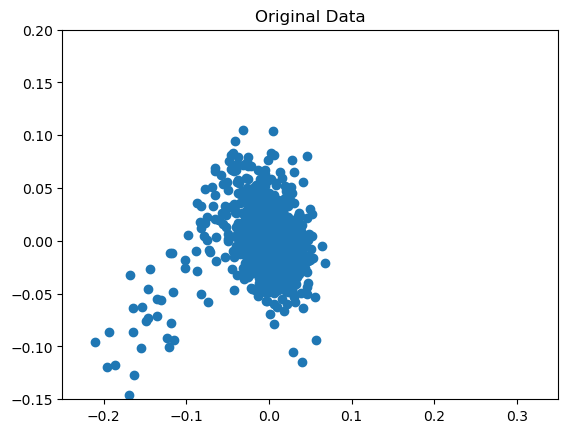

In [118]:
U, _, _ = np.linalg.svd(np.cov(eigenvectors.T))

fig = plt.figure()

x = eigenvectors @ U[:, 0]
y = eigenvectors @ U[:, 1]

plt.scatter(x, y)
plt.xlim(-0.25, 0.35)
plt.ylim(-0.15, 0.2)
plt.title("Original Data")
plt.show()